<a href="https://colab.research.google.com/github/SantonioTheFirst/DataAnalysis/blob/main/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d christianlillelund/csgo-round-winner-classification

  0% 0.00/3.53M [00:00<?, ?B/s]
100% 3.53M/3.53M [00:00<00:00, 115MB/s]


In [ ]:
!unzip csgo-round-winner-classification.zip

Archive:  csgo-round-winner-classification.zip
  inflating: csgo_round_snapshots.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer

# Разведочный анализ данных

In [ ]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [ ]:
df.shape

(122410, 97)

In [ ]:
df.head(15)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,10550.0,5.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,5000.0,3.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,...,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.0,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,2.773638,1.613724,4.273752,4.266187,0.274602,1.243926,0.134613,0.007638,0.573695,0.321191,0.0,0.000082,0.151989,0.106053,0.004011,0.001773,0.110138,0.004738,0.0,0.000792,0.011045,0.110301,0.006919,3.310195,0.000008,0.0,0.063818,0.002729,1.076236,0.052733,...,0.000163,0.000155,0.0,0.000057,0.0,0.000139,0.000719,0.000008,0.239147,0.824941,0.059505,0.020440,0.046426,0.036468,0.007557,0.000261,0.440675,0.380868,0.061751,0.009386,3.179789,0.122400,0.236974,0.291618,0.174046,0.004934,0.008120,0.028323,0.899101,0.438257,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,2.010915,1.605780,1.205500,1.228325,0.584092,1.363887,0.460303,0.091456,0.673249,0.476667,0.0,0.009038,0.445910,0.379993,0.063206,0.042067,0.388980,0.070780,0.0,0.037148,0.112130,0.405933,0.086935,1.625785,0.002858,0.0,0.262884,0.053096,1.219112,0.247009,...,0.012781,0.012458,0.0,0.007562,0.0,0.011784,0.026803,0.002858,0.554073,1.139545,0.264790,0.146044,0.230066,0.211221,0.088096,0.016166,0.834516,0.814730,0.288498,0.100087,1.586788,0.438928,0.533787,0.579258,0.425142,0.074807,0.094879,0.191538,1.281569,0.808149,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
df.isna().sum().sum()

0

# Попарная корреляция признаков

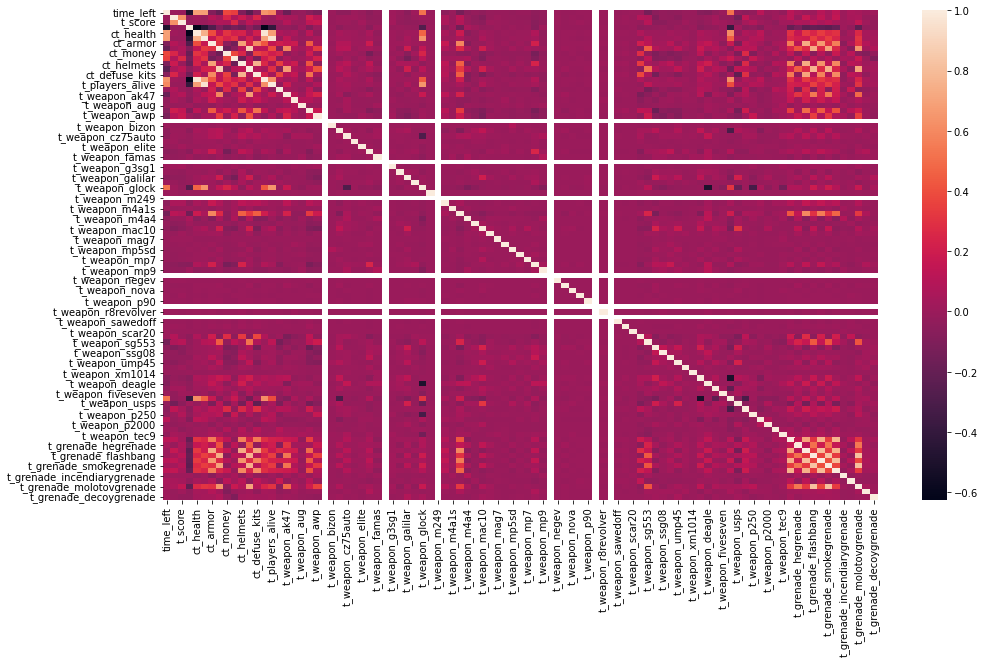

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

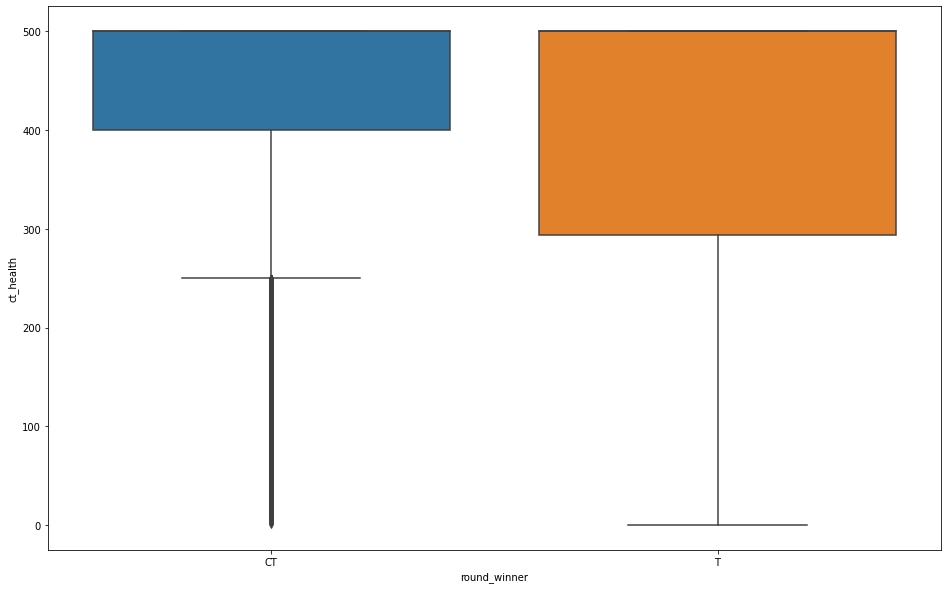

In [ ]:
fig = plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='round_winner', y='ct_health')
plt.show()

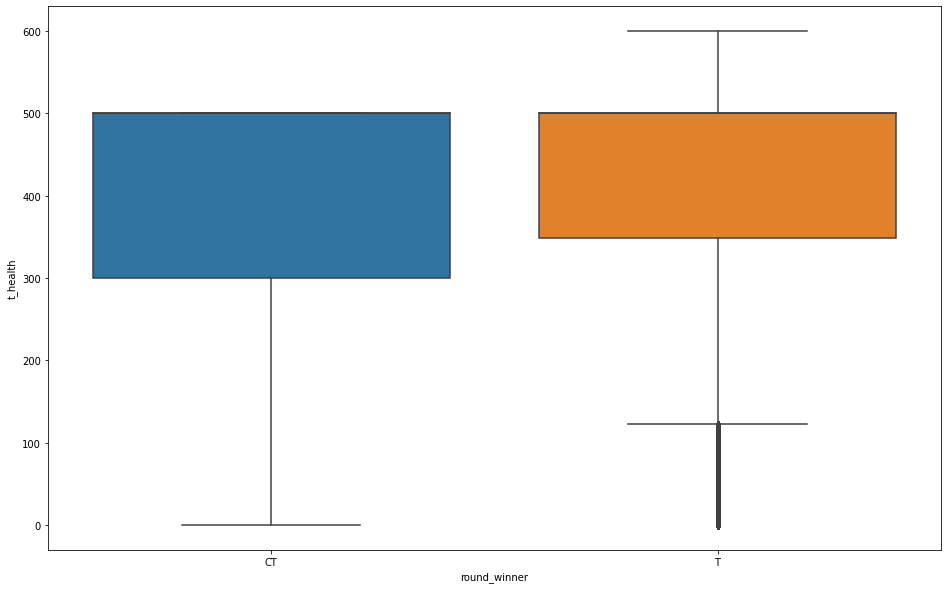

In [ ]:
fig = plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='round_winner', y='t_health')
plt.show()

# Кол-во уникальных значений каждого признака

In [ ]:
for col in df.columns:
  print(col, df[col].nunique())

time_left 10782
ct_score 33
t_score 34
map 8
bomb_planted 2
ct_health 501
t_health 502
ct_armor 415
t_armor 477
ct_money 1360
t_money 1399
ct_helmets 6
t_helmets 6
ct_defuse_kits 6
ct_players_alive 6
t_players_alive 7
ct_weapon_ak47 5
t_weapon_ak47 6
ct_weapon_aug 6
t_weapon_aug 4
ct_weapon_awp 6
t_weapon_awp 5
ct_weapon_bizon 1
t_weapon_bizon 2
ct_weapon_cz75auto 6
t_weapon_cz75auto 7
ct_weapon_elite 2
t_weapon_elite 2
ct_weapon_famas 6
t_weapon_famas 3
ct_weapon_g3sg1 1
t_weapon_g3sg1 5
ct_weapon_galilar 3
t_weapon_galilar 6
ct_weapon_glock 4
t_weapon_glock 10
ct_weapon_m249 2
t_weapon_m249 1
ct_weapon_m4a1s 4
t_weapon_m4a1s 3
ct_weapon_m4a4 6
t_weapon_m4a4 4
ct_weapon_mac10 4
t_weapon_mac10 6
ct_weapon_mag7 3
t_weapon_mag7 2
ct_weapon_mp5sd 2
t_weapon_mp5sd 3
ct_weapon_mp7 3
t_weapon_mp7 3
ct_weapon_mp9 6
t_weapon_mp9 4
ct_weapon_negev 1
t_weapon_negev 2
ct_weapon_nova 2
t_weapon_nova 2
ct_weapon_p90 2
t_weapon_p90 2
ct_weapon_r8revolver 1
t_weapon_r8revolver 2
ct_weapon_sawedoff 1


# Выделим численные и категориальные признаки

In [ ]:
single_value_columns = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=single_value_columns, inplace=True)


num_cols = df.select_dtypes([np.number]).columns
obj_cols = df.select_dtypes(['object', 'bool']).columns
# len(num_cols) + len(obj_cols)

In [ ]:
assert len(num_cols) + len(obj_cols) == len(df.columns), 'Error!'

In [ ]:
df[num_cols]

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,...,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,t_weapon_r8revolver,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df[obj_cols]

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


# Создадим энкодер. OrdinalEncoder работает как и LabelEncoder, но LabelEncoder не работает с Pipeline

In [ ]:
encoder = OrdinalEncoder(dtype=int)

In [ ]:
df[obj_cols] = pd.DataFrame(data=encoder.fit_transform(df[obj_cols]), 
                                        columns=obj_cols)

# После перевода round_winner в численный тип посчитаем корреляцию признаков с целевой переменной

In [ ]:
corrs = df.corrwith(df['round_winner'])
corr_measures = {}
for col, measure in zip(df.columns, corrs):
  corr_measures[col] = measure
corr_measures

{'bomb_planted': 0.187100907820933,
 'ct_armor': -0.33638179251037115,
 'ct_defuse_kits': -0.29155674026235173,
 'ct_grenade_decoygrenade': -0.0226776773511592,
 'ct_grenade_flashbang': -0.2538675257549794,
 'ct_grenade_hegrenade': -0.1687811235620499,
 'ct_grenade_incendiarygrenade': -0.16851728200930555,
 'ct_grenade_molotovgrenade': -0.07975754660574076,
 'ct_grenade_smokegrenade': -0.20997487408276416,
 'ct_health': -0.19066197016044184,
 'ct_helmets': -0.3082551499048964,
 'ct_money': -0.12932629273447055,
 'ct_players_alive': -0.21679787498043127,
 'ct_score': -0.05730367211807214,
 'ct_weapon_ak47': -0.16685520869426393,
 'ct_weapon_aug': -0.08057824104893607,
 'ct_weapon_awp': -0.1986256963103327,
 'ct_weapon_cz75auto': 0.013851557053835539,
 'ct_weapon_deagle': 0.014515378139363195,
 'ct_weapon_elite': -0.015853330428411163,
 'ct_weapon_famas': -0.04992163765323669,
 'ct_weapon_fiveseven': 0.024262807330685882,
 'ct_weapon_galilar': -0.03516174653752268,
 'ct_weapon_glock': -0

In [ ]:
sorted_corr_measures = pd.DataFrame(sorted(corr_measures.items(), key=lambda x: x[1]), columns=['name', 'measure'])

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

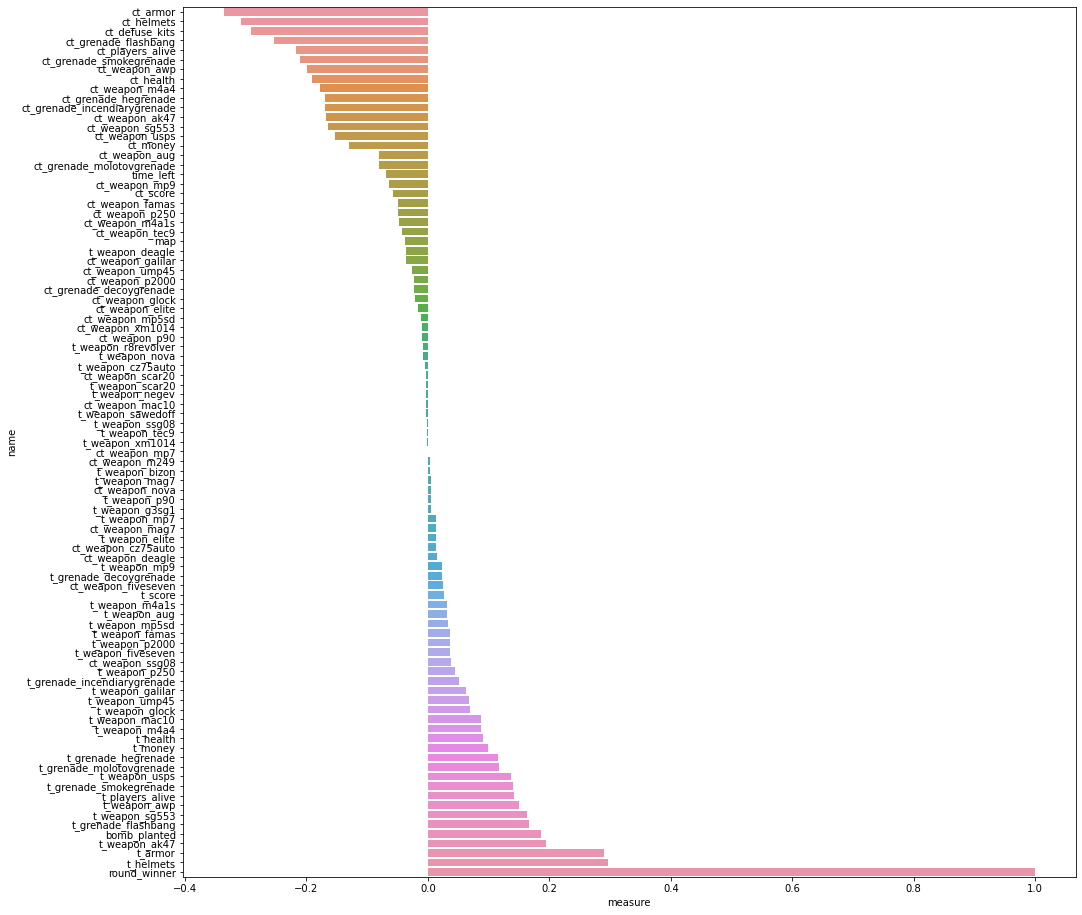

In [ ]:
fig = plt.figure(figsize=(16, 16))
sns.barplot(x=sorted_corr_measures['measure'], y=sorted_corr_measures['name'])
plt.show()

# Как видно из диаграммы, признаки, связанные с оружием, слабо связаны со значением целевой переменной. Остальные признаки тоже слабо связаны с round_winner (corr <= 0.3), значит алгоритмы лин. классификации могут дать плохие результаты

In [ ]:
non_weapon_columns = [col for col in df.columns if 'weapon' not in col \
                      and 'grenade' not in col and 'bang' not in col]
len(non_weapon_columns)

17

In [ ]:
sorted_corr_measures['abs'] = sorted_corr_measures['measure'].apply(np.abs)

In [ ]:
sorted_abs_measures = sorted_corr_measures.sort_values(by='abs', ascending=False)
t_cols = sorted_abs_measures.name.apply(lambda x: x in non_weapon_columns)
cols_for_pairplot = sorted_abs_measures[t_cols].iloc[:10].name

# Проверим сбалансированность классов


In [ ]:
df['round_winner'].value_counts()

1    62406
0    60004
Name: round_winner, dtype: int64

<Figure size 1152x720 with 0 Axes>

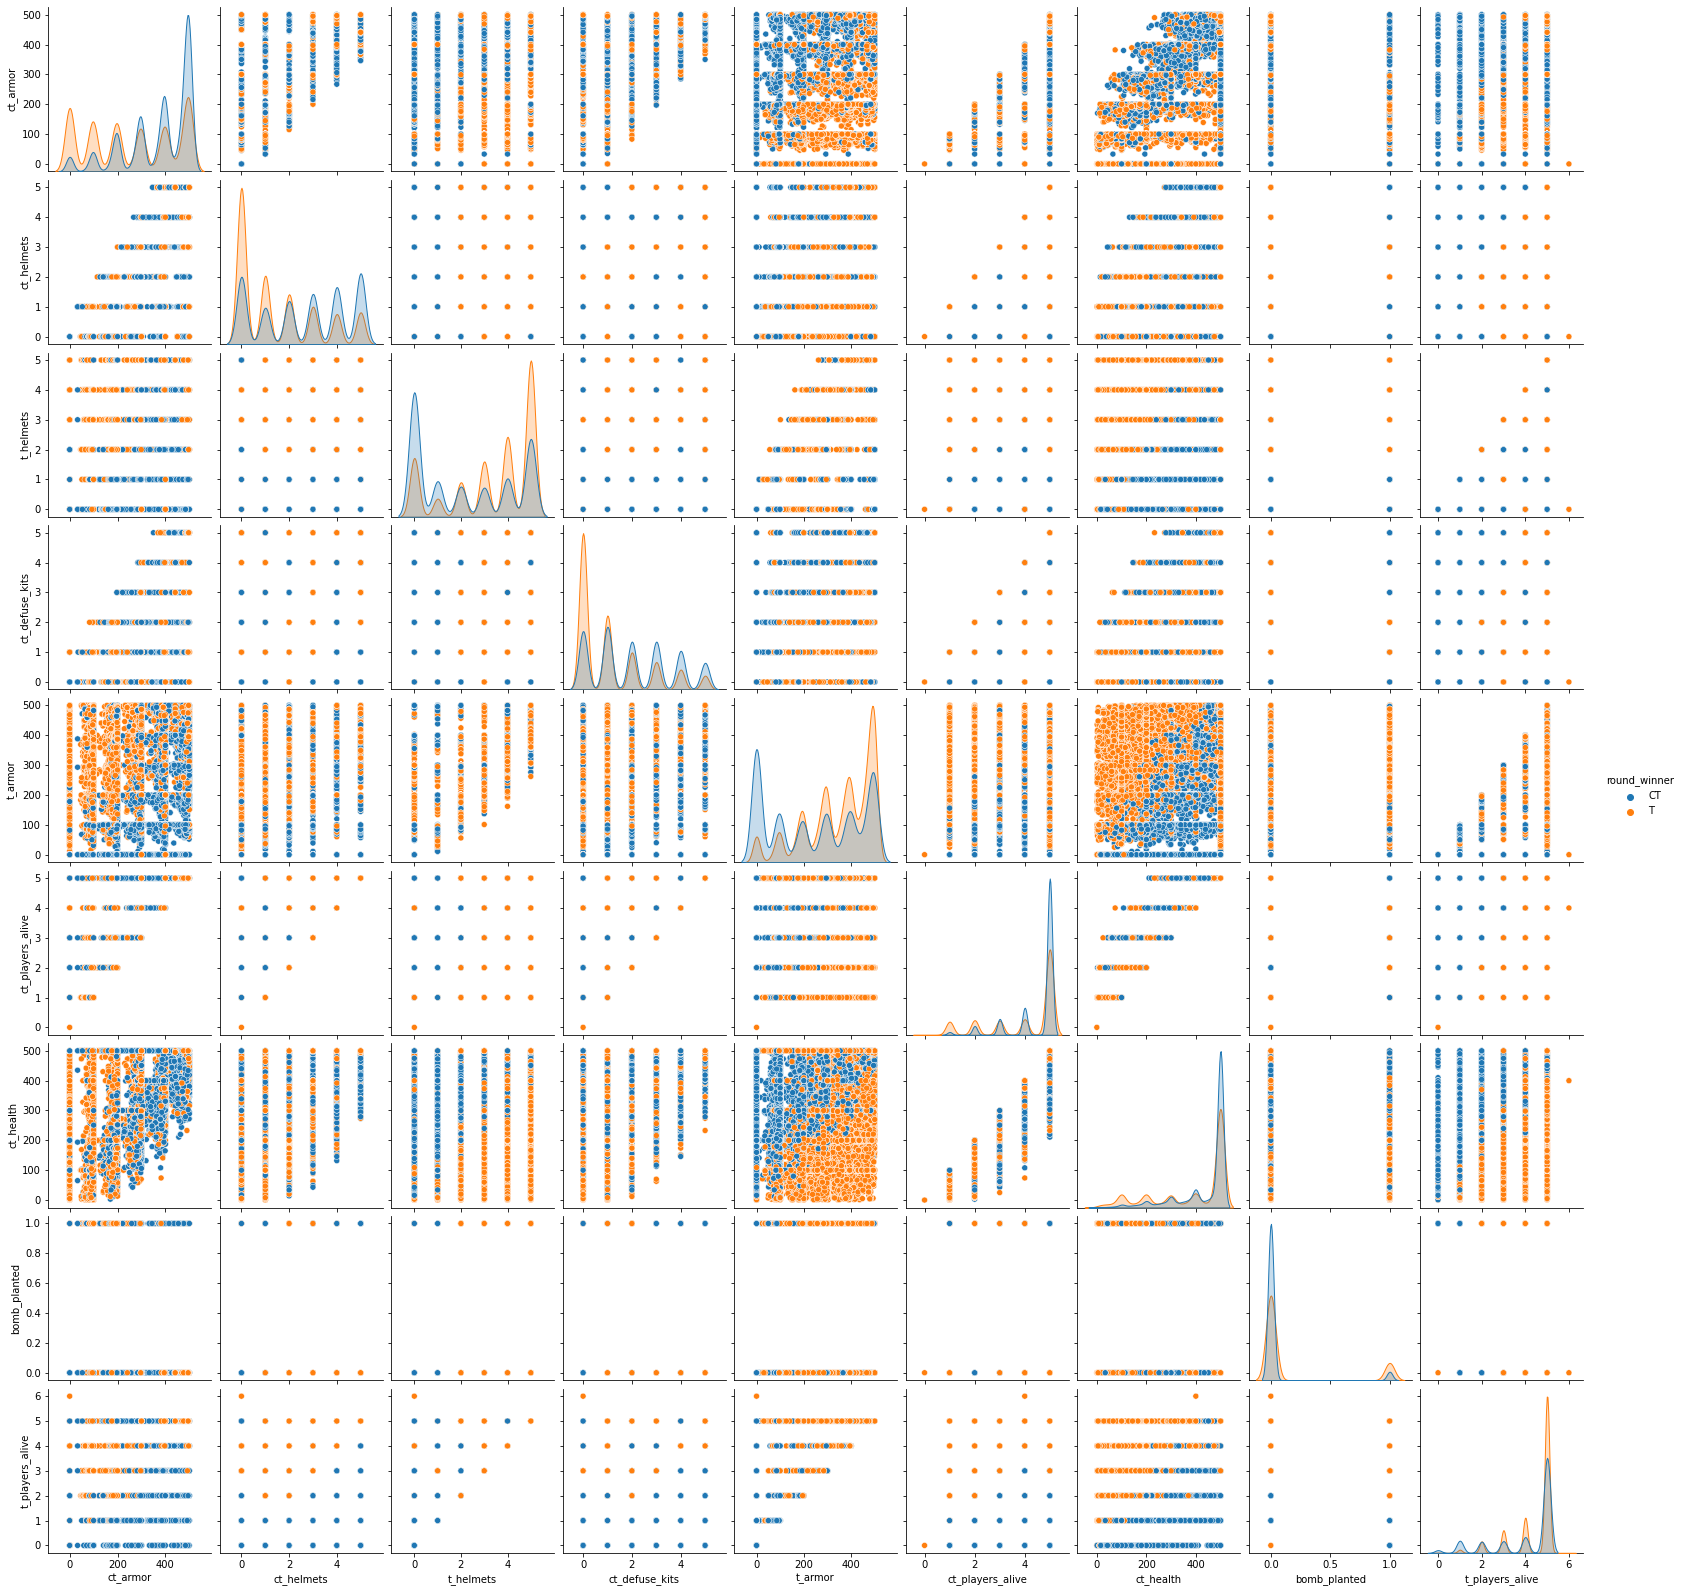

In [ ]:
fig = plt.figure(figsize=(16, 10))
sns.pairplot(df[cols_for_pairplot], hue='round_winner')
plt.savefig('fig.jpg')

In [ ]:
scaler = StandardScaler()

In [ ]:
df[num_cols] = scaler.fit_transform(df[num_cols])

# Берем только признаки, не связанные с оружием


In [ ]:
X = df[cols_for_pairplot].drop(columns=['round_winner'])
y = df['round_winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
LogRegClf = LogisticRegression(random_state=5)

In [ ]:
LogRegClf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = LogRegClf.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     12005
           1       0.76      0.75      0.75     12477

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [ ]:
RFClf = RandomForestClassifier(random_state=5, max_depth=4)

In [ ]:
RFClf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
predictions = RFClf.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     12005
           1       0.76      0.74      0.75     12477

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



              precision    recall  f1-score   support

           0       0.70      0.80      0.75     12005
           1       0.78      0.68      0.72     12477

    accuracy                           0.74     24482
   macro avg       0.74      0.74      0.74     24482
weighted avg       0.74      0.74      0.74     24482



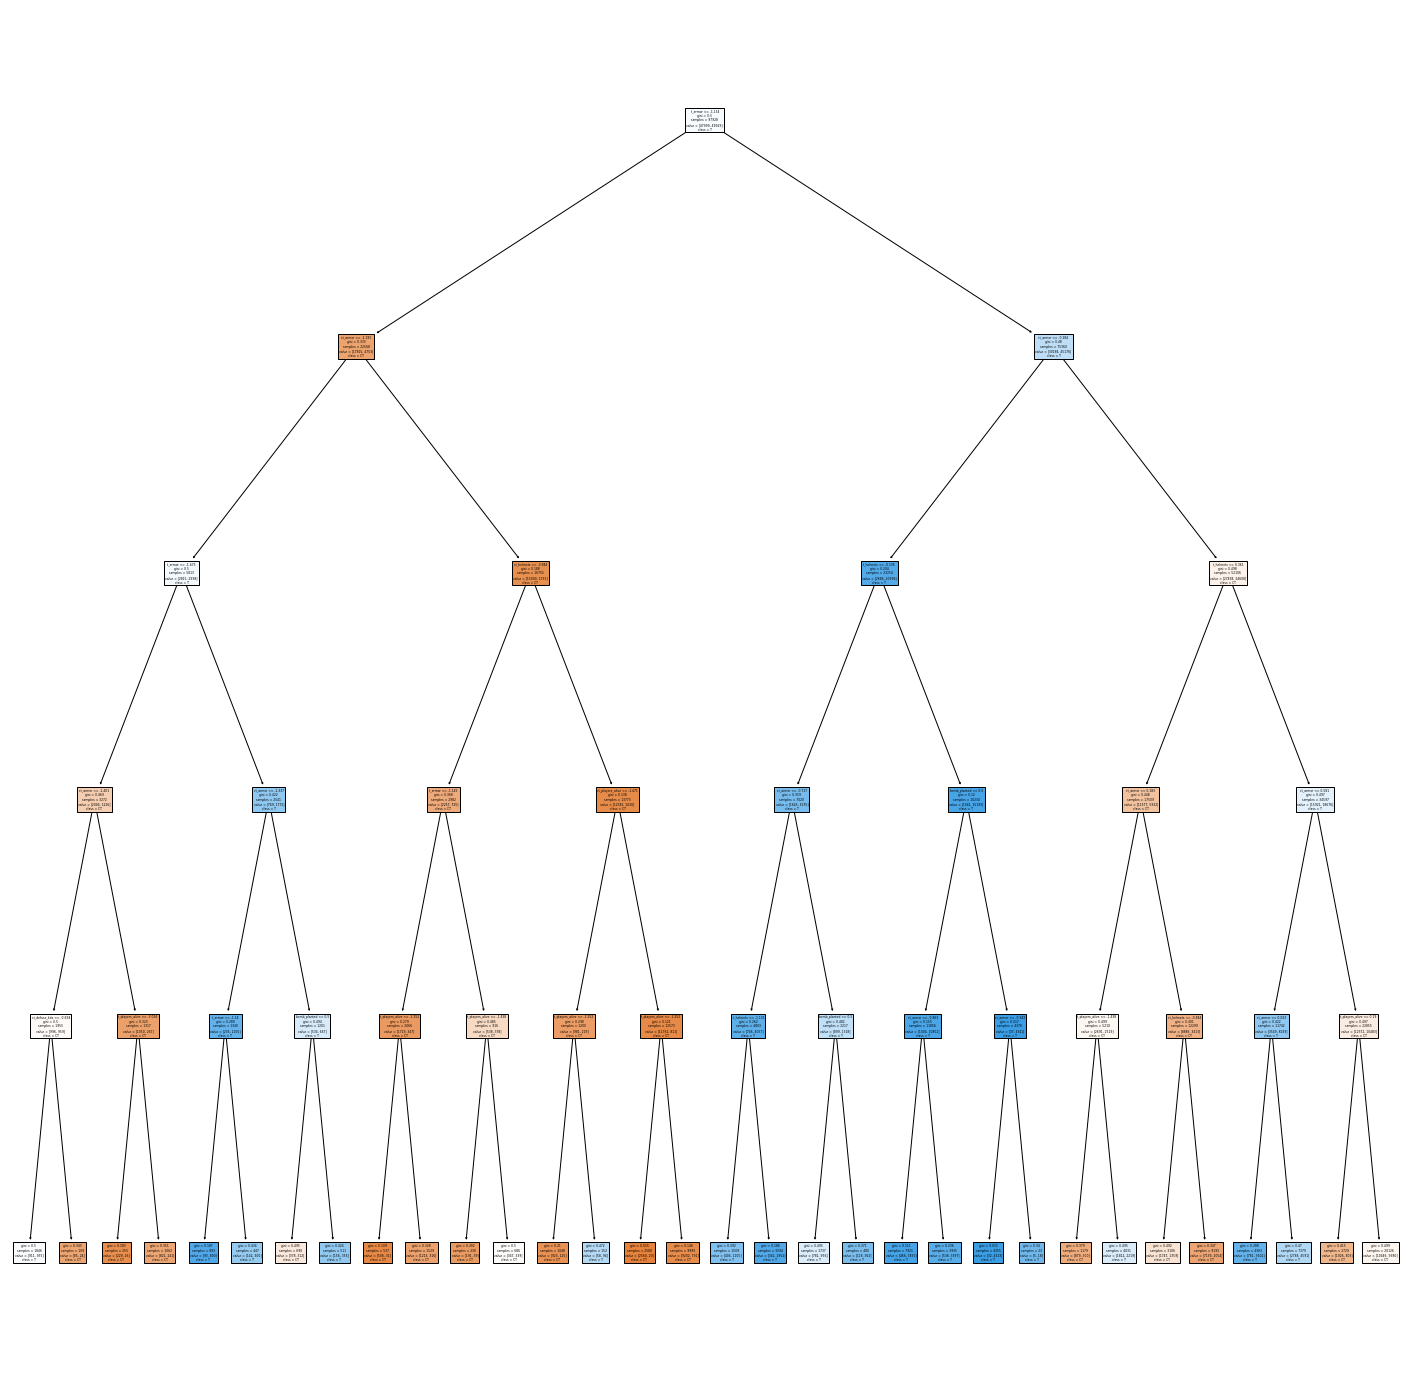

In [ ]:
dctc = DecisionTreeClassifier(random_state=5, max_depth=5)
dctc.fit(X_train, y_train)
predictions = dctc.predict(X_test)
print(classification_report(y_test, predictions))

fig = plt.figure(figsize = (25, 25))
plot_tree(dctc, feature_names=X_train.columns, class_names = ['CT', 'T'], filled = True)
plt.show()

# Пробное обучение двух классификаторов дало неплохие результаты, но далеко не идеальные. Нужно сделать fine tuning гиперпараметров. Было решено использовать все признаки из датафрейма.

In [ ]:
df = pd.read_csv('csgo_round_snapshots.csv')
X = df.drop(columns=['round_winner'])
y = df.round_winner
y = pd.DataFrame(data=OrdinalEncoder().fit_transform(pd.DataFrame(y)), columns=['round_winner'])
y = y.round_winner

In [ ]:
single_value_columns = [col for col in df.columns if df[col].nunique() <= 1]
X.drop(columns=single_value_columns, inplace=True)
num_cols = X.select_dtypes([np.number]).columns
cat_cols = X.select_dtypes(['bool', 'object']).columns

# X[single_value_columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Функция для создания пайплайна с трансформерами

In [ ]:
def get_pipeline(model, num_cols, cat_cols):
  num_transformer = Pipeline(
      [
      ('scaler', StandardScaler())
      ]
  )

  cat_transformer = Pipeline(
      [
      ('encoder', OrdinalEncoder())
      ]
  )
  preprocessor = ColumnTransformer(
    [
      ('numerical', num_transformer, num_cols),
      ('categorical', cat_transformer, cat_cols)
    ]
  )
  pipeline = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('model', model)
    ]
  )
  return pipeline

# Поиск оптимальных гиперпараеметров с помощью подбора по сетке   


In [ ]:
def get_best_estimator(model, X_train, X_test, y_train, y_test, num_cols, cat_cols, params=None):
  grid_pipeline = GridSearchCV(get_pipeline(model, num_cols, cat_cols),
                               params, scoring='f1', cv=3)
  grid_pipeline.fit(X_train, y_train)
  print(f'Best score: {grid_pipeline.best_score_}')
  estimator = grid_pipeline.best_estimator_
  estimator.fit(X_train, y_train)
  predictions = estimator.predict(X_test)
  print(classification_report(y_test, predictions))
  print(confusion_matrix(y_test, predictions))
  return estimator

In [ ]:
# params = {'model__C': [1.0, 3.0, 5.0, 8.0, 10.0, 12.0]}
# params = {'model__n_estimators': [500], 'model__min_samples_leaf': [2, 3, 4],
#  'model__max_depth': np.arange(32, 36), 'model__criterion': ['gini', 'entropy']}
# params = {'model__n_neighbors' : [5]}
rs = 5
models_params_1 = {
    'LogReg': {
        'model': LogisticRegression(random_state=rs, max_iter=500),
        'params': {'model__C': [1.0, 5.0, 10.0]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=rs),
        'params': {
            'model__n_estimators': [500],
            'model__min_samples_leaf': [2, 3, 4],
            'model__max_depth': np.arange(32, 36),
            'model__criterion': ['gini', 'entropy']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=rs),
        'params': {
            'model__min_samples_leaf': [2, 3, 4],
            'model__max_depth': np.arange(5, 40),
            'model__criterion': ['gini', 'entropy']
        }
    },
    'kNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [5, 6]
        }
    }
}

models_params_2 = {
    'SVC': {
        'model': SVC(random_state=rs),
        'params': {
            'model__C': [1.0, 0.8],
            'model__gamma': ['scale', 'auto']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=rs),
        'params': {
            'model__base_estimator': [DecisionTreeClassifier(), RandomForestClassifier()],
            'model__base_estimator__max_depth': np.arange(5)
        }
    }
}

In [ ]:
AdB = AdaBoostClassifier(random_state=5, base_estimator=RandomForestClassifier(max_depth=5))
p = get_pipeline(AdB, num_cols, cat_cols)
p.fit(X_train, y_train)
pr = p.predict(X_test)
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     12005
         1.0       0.81      0.77      0.79     12477

    accuracy                           0.79     24482
   macro avg       0.79      0.79      0.79     24482
weighted avg       0.79      0.79      0.79     24482



In [ ]:
def do_all_stuff(models, X_train, X_test, y_train, y_test, num_cols, cat_cols):
  best_models = {}
  for model in models:
    print(f'{"#"*20}\n{model}')
    estimator = get_best_estimator(
        models[model]['model'],
        X_train,
        X_test,
        y_train,
        y_test,
        num_cols,
        cat_cols,
        params=models[model]['params']
    )
    # print(models[model]['params'])
    best_models[model] = estimator
  return best_models

In [ ]:
best_models_1 = do_all_stuff(models_params_1, X_train, X_test, y_train, y_test, num_cols, cat_cols)

####################
LogReg
Best score: 0.7508958225618407
              precision    recall  f1-score   support

         0.0       0.74      0.75      0.75     12005
         1.0       0.76      0.75      0.75     12477

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482

[[9024 2981]
 [3171 9306]]
####################
RandomForest
Best score: 0.8484353937261205
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     12005
         1.0       0.89      0.86      0.87     12477

    accuracy                           0.87     24482
   macro avg       0.87      0.87      0.87     24482
weighted avg       0.87      0.87      0.87     24482

[[10639  1366]
 [ 1738 10739]]
####################
DecisionTree
Best score: 0.7892190436055927
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82 

In [ ]:
best_models_2 = do_all_stuff(models_params_2, X_train, X_test, y_train, y_test, num_cols, cat_cols)

####################
SVC
Best score: 0.7772044995766002
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     12005
         1.0       0.83      0.75      0.78     12477

    accuracy                           0.79     24482
   macro avg       0.79      0.79      0.79     24482
weighted avg       0.79      0.79      0.79     24482

[[10030  1975]
 [ 3142  9335]]
####################
AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-t

Best score: 0.7704548888691627
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     12005
         1.0       0.80      0.75      0.77     12477

    accuracy                           0.78     24482
   macro avg       0.78      0.78      0.78     24482
weighted avg       0.78      0.78      0.78     24482

[[9625 2380]
 [3098 9379]]


In [ ]:
rfc = best_models_1['RandomForest']
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     12005
         1.0       0.89      0.86      0.87     12477

    accuracy                           0.87     24482
   macro avg       0.87      0.87      0.87     24482
weighted avg       0.87      0.87      0.87     24482

[[10639  1366]
 [ 1738 10739]]


In [ ]:
import pickle

In [ ]:
with open('best_models_1.pickle', 'wb') as handle:
    pickle.dump(best_models_1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('best_models_2.pickle', 'wb') as handle:
    pickle.dump(best_models_2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!xz best_models_1.pickle

In [ ]:
!xz best_models_2.pickle